# Astra simulation

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format = 'retina'

Make an Astra object

In [3]:
from astra import Astra

In [4]:
A = Astra('astra.in')

Change some inputs

In [6]:
# A.input['newrun']['zemit']  = 1000
# A.input['newrun']['zphase'] = 20
# A.input['newrun']['phases'] = True
# A.input['output']['zstop']  = 1

# Special flags
A.timeout = None
A.verbose = True

Run

In [10]:
A.run()

 --------------------------------------------------------------------------

               Astra - A space charge tracking algorithm 
                             Version 4.0              
                         DESY,  Hamburg 2022          
                          3. 6.2024   1:43

     Parameter file is:  astra.in                                          
     astra input file                                                                

 Initialize element settings:
 --------------------------------------------------------------------------
 Aperture:

     Reading aperture data from: aperture.dat                                                                    
 --------------------------------------------------------------------------
 Cavity:

     Reading cavity field data from:      3d_gun                                                                          
     3D RF-structure length               5.9200E-02 m
     Number of periods                      1
     3

Output is automatically parsed into a .output dict

In [11]:
A.output.keys()

dict_keys(['stats', 'particles', 'run_info'])

These are the statistics from Astra's Xemit style files

In [12]:
A.output['stats'].keys()

dict_keys(['mean_z', 'norm_emit_x', 'core_emit_95percent_x', 'core_emit_90percent_x', 'core_emit_80percent_x', 'norm_emit_y', 'core_emit_95percent_y', 'core_emit_90percent_y', 'core_emit_80percent_y', 'norm_emit_z', 'core_emit_95percent_z', 'core_emit_905percent_z', 'core_emit_80percent_z', 'mean_t', 'mean_x', 'sigma_x', 'sigma_xp', 'cov_x__xp', 'mean_y', 'sigma_y', 'sigma_yp', 'cov_y__yp', 'mean_kinetic_energy', 'sigma_z', 'sigma_energy', 'cov_z__energy'])

Some simple run info:

In [13]:
A.output['run_info']

{'start_time': 1717379009.522041,
 'run_script': '/home/jovyan/Astra astra.in',
 'run_time': 852.3599684238434}

Other data, such as from the LandF file, are stored in `other`:

In [14]:
A.output['other']

KeyError: 'other'

This is the path that work was done. By default, this will be automatically cleaned up.

In [15]:
A.path

'/tmp/tmpp85x3ivg'

# Plotting

The Astra object has built in plotting. The defaults will plot the beam sizes as lines, data calculated from particles as dots, and the fieldmaps.

Loading fieldmap file /home/jovyan/work/buncher_1.dat
Loading fieldmap file /home/jovyan/work/sol_50_mm.dat
Loading fieldmap file /home/jovyan/work/10A_length_150mm.dat


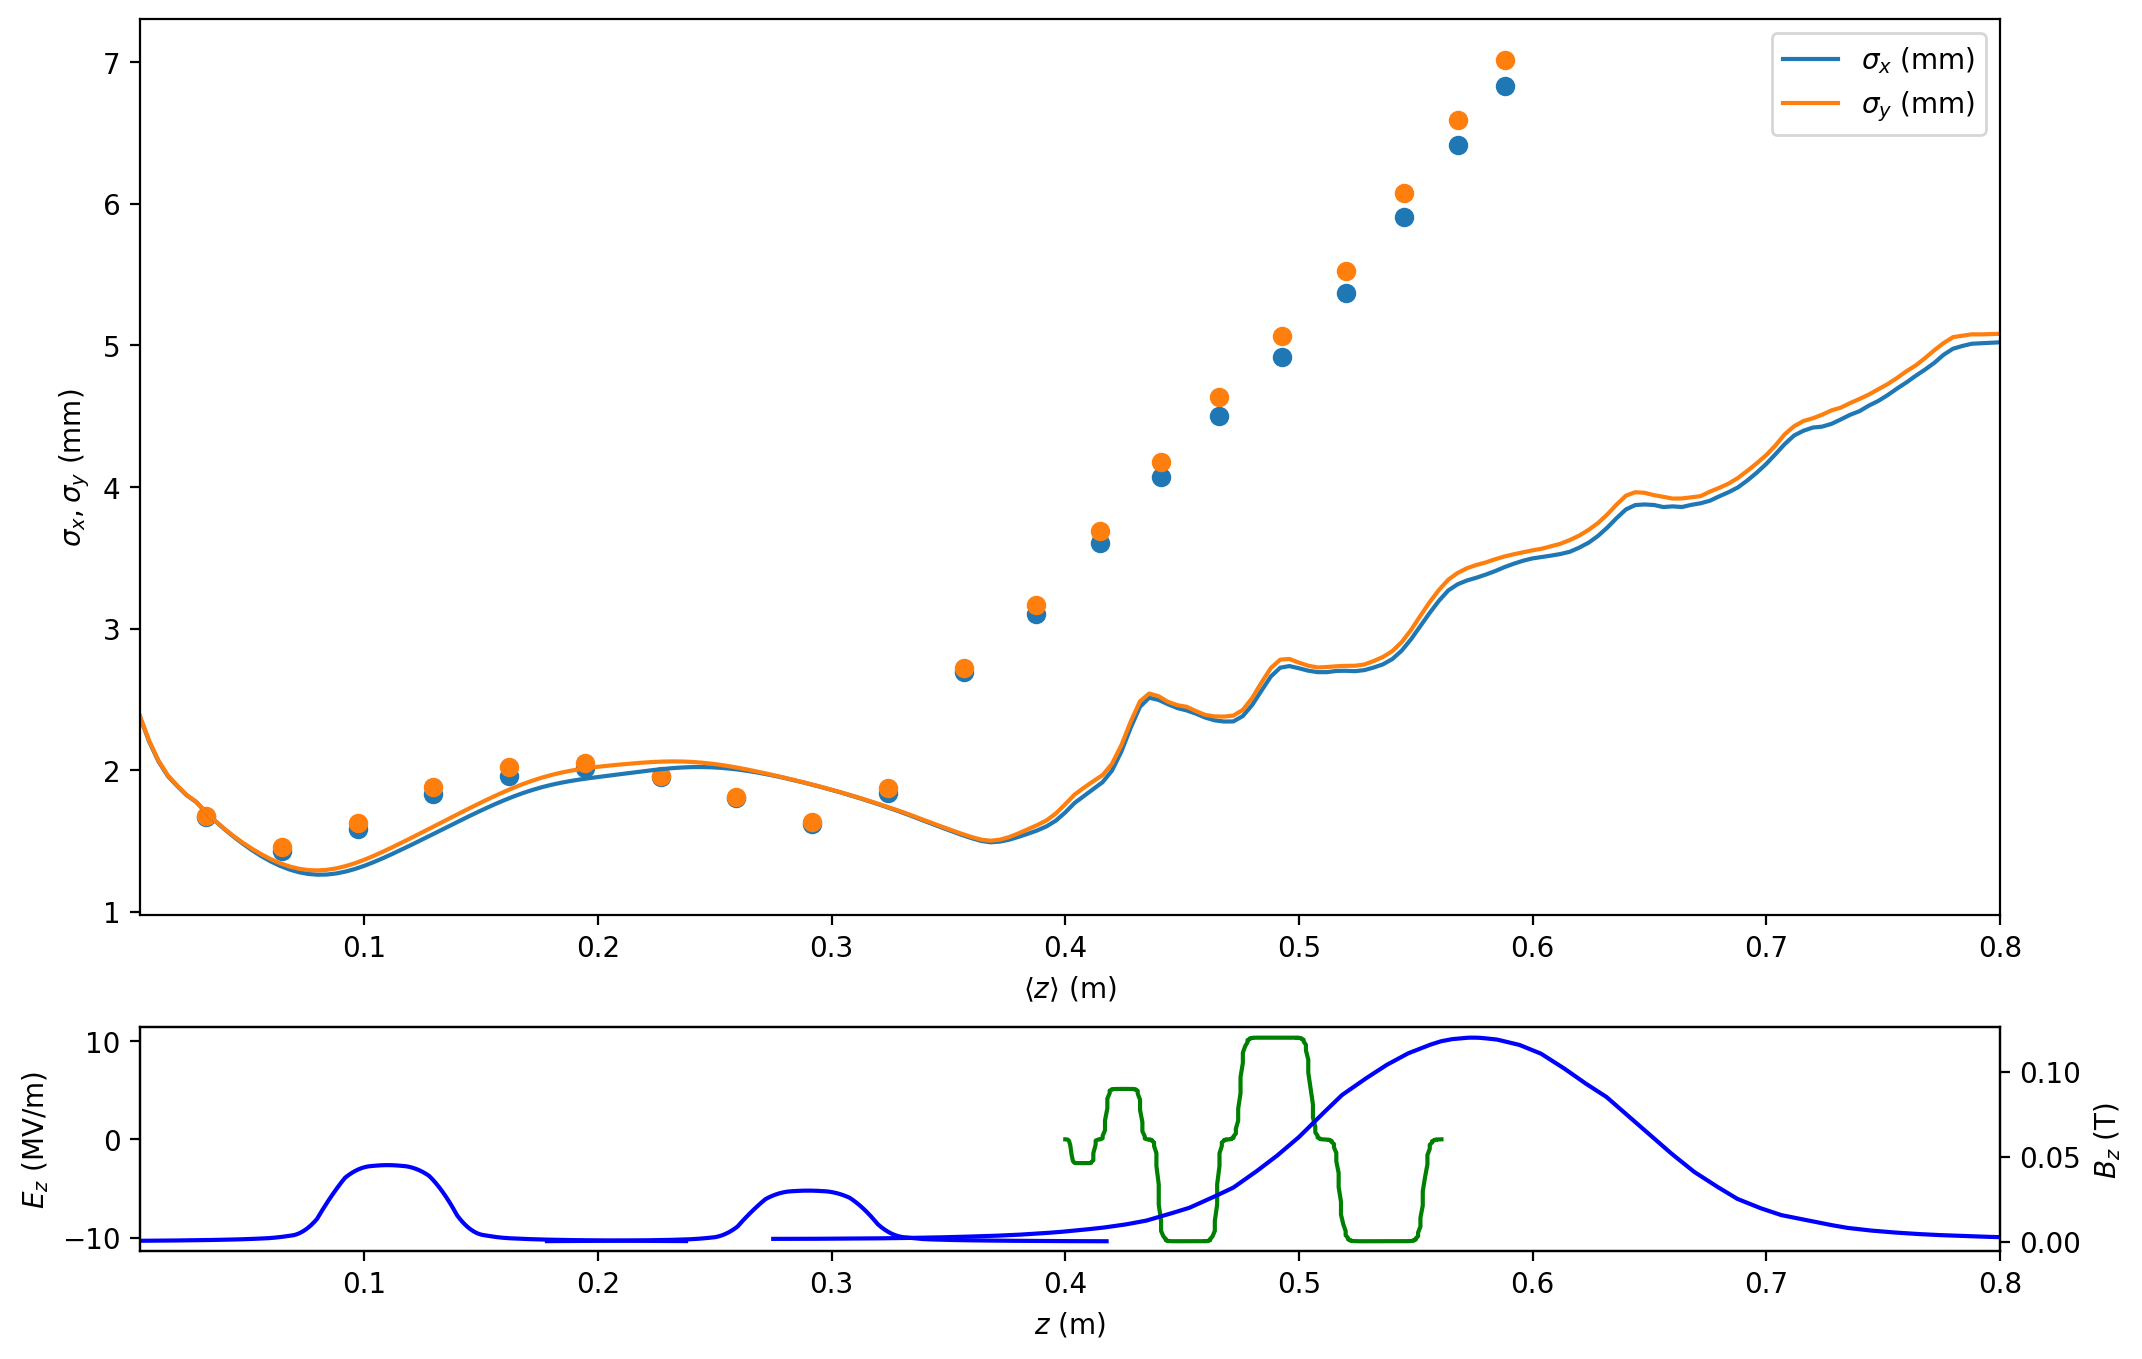

In [16]:
A.plot()

This has some fancier options:

Loading fieldmap file /home/jovyan/work/buncher_1.dat
Loading fieldmap file /home/jovyan/work/sol_50_mm.dat
Loading fieldmap file /home/jovyan/work/10A_length_150mm.dat


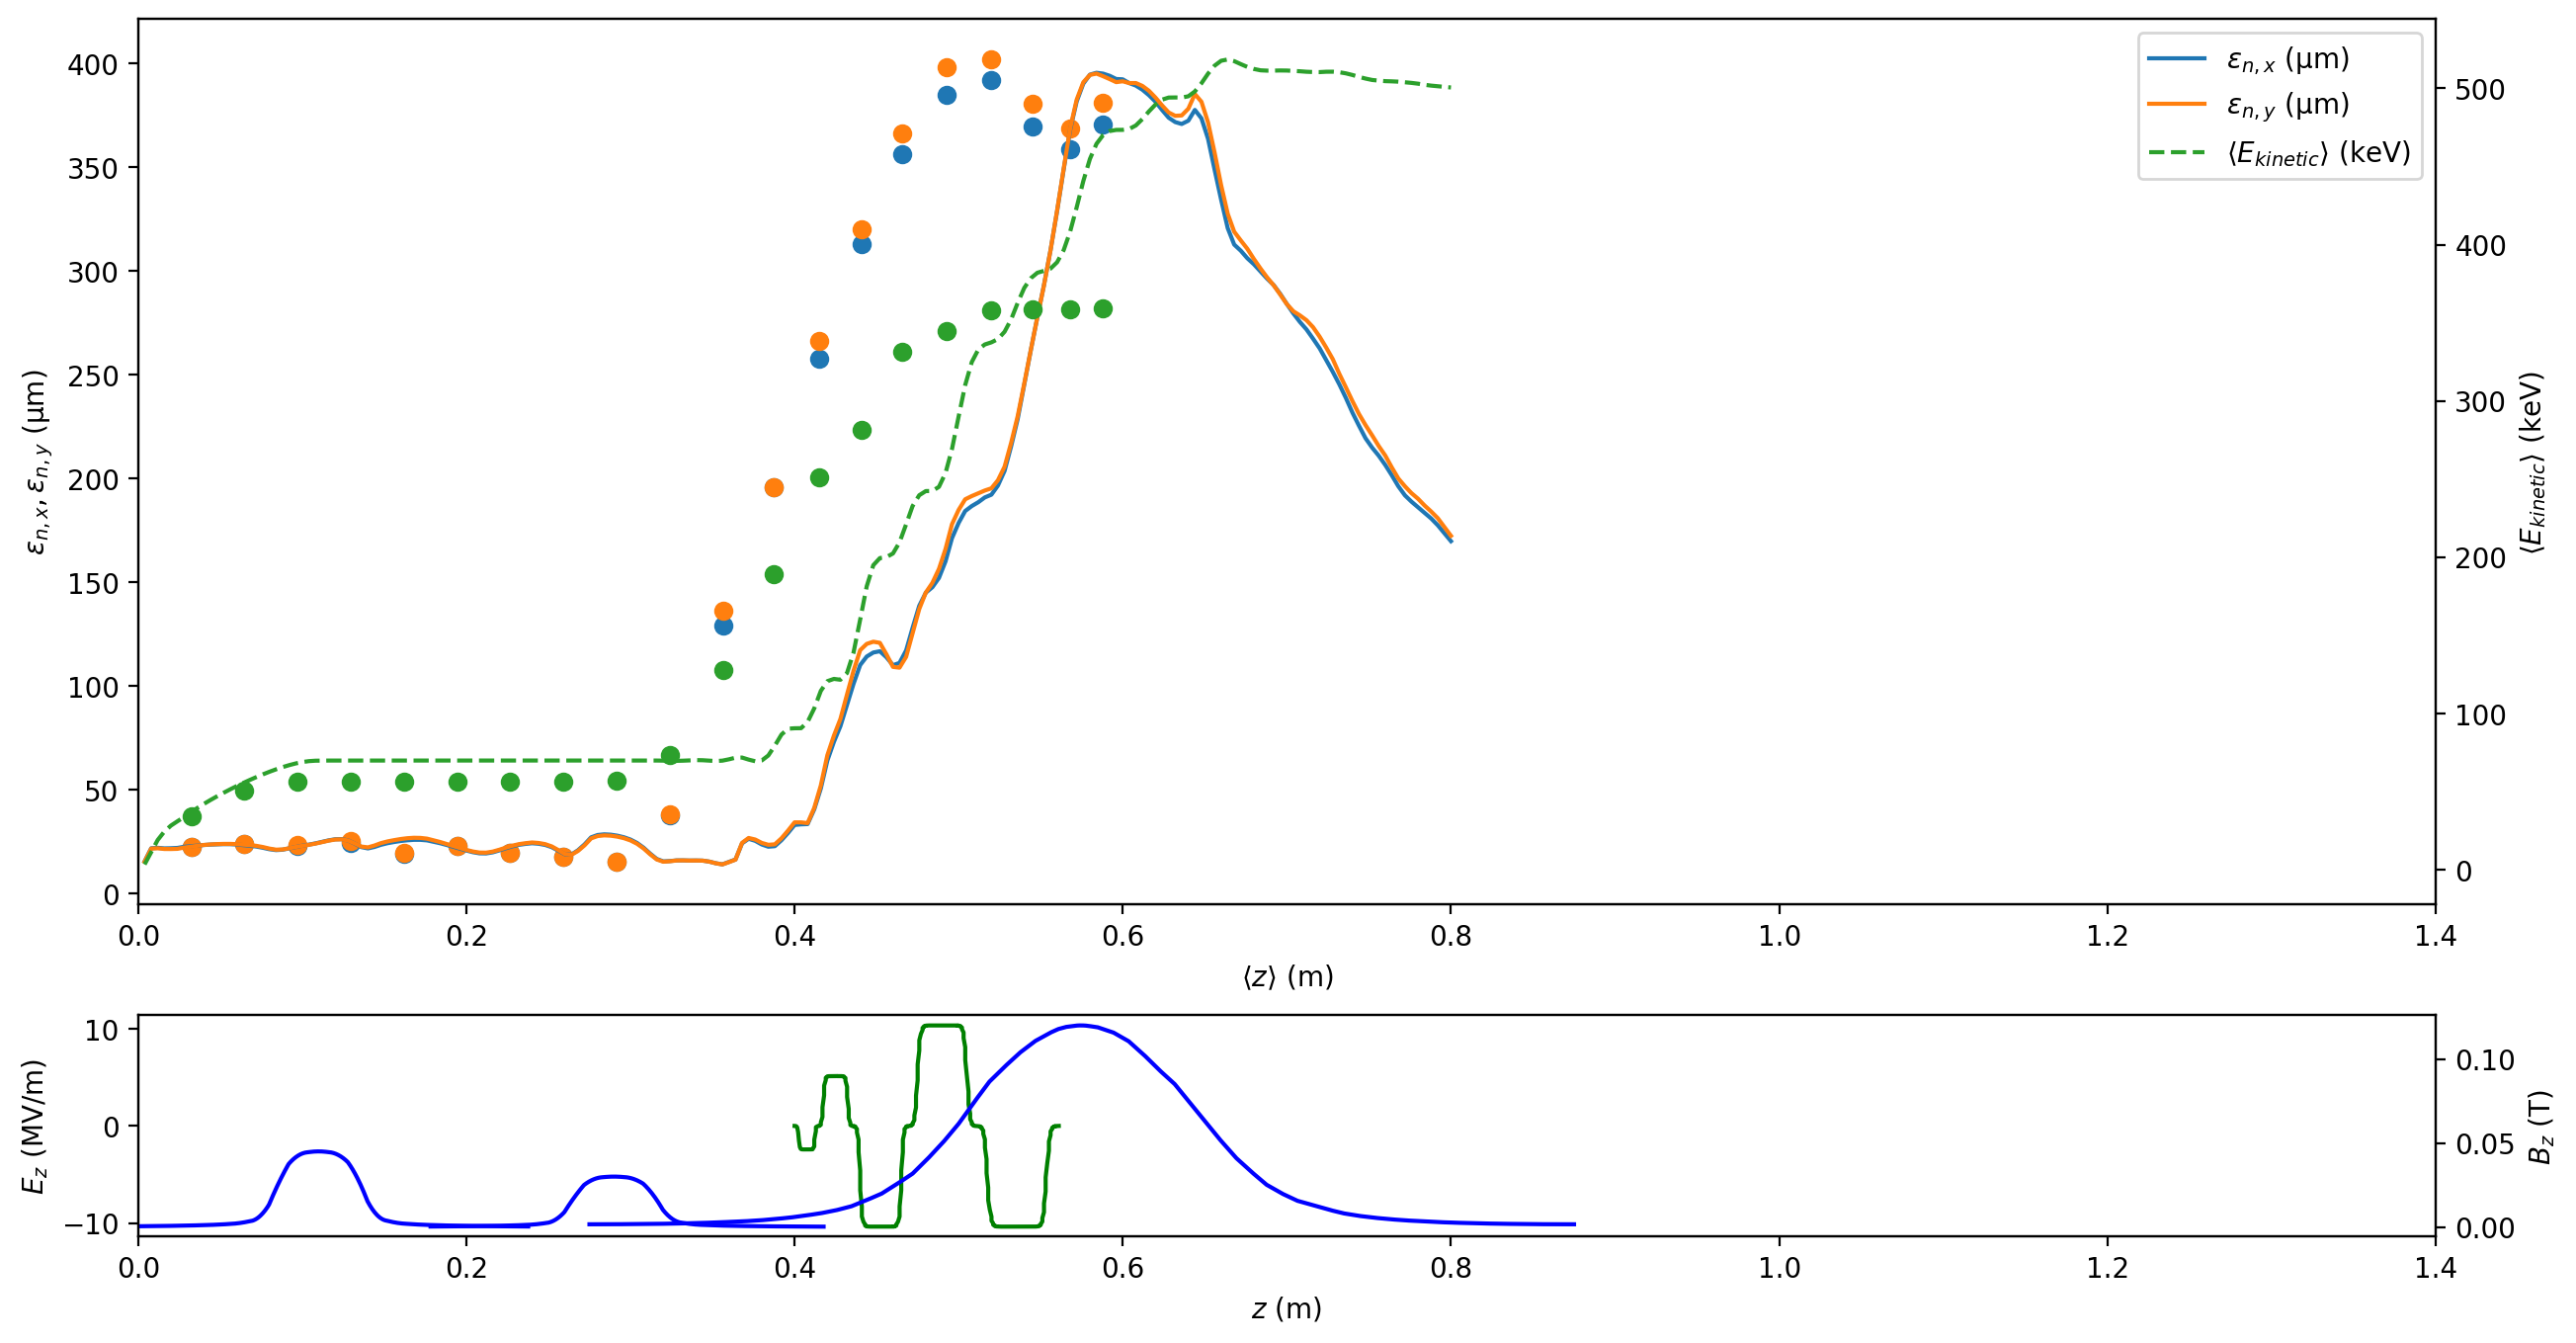

In [18]:
A.plot(['norm_emit_x', 'norm_emit_y'], y2='mean_kinetic_energy', xlim = (0, 1.4), figsize=(15,8) )

# Particles 

Particles are automatically parsed in to openpmd-beamphysics `ParticleGroup` objects

In [19]:
A.output['particles']

[<ParticleGroup with 200000 particles at 0x7f38e40309d0>,
 <ParticleGroup with 200000 particles at 0x7f38e3d38bd0>,
 <ParticleGroup with 200000 particles at 0x7f38e3d3a590>,
 <ParticleGroup with 200000 particles at 0x7f38e3d6f390>,
 <ParticleGroup with 200000 particles at 0x7f38e3d6f550>,
 <ParticleGroup with 200000 particles at 0x7f38e4039690>,
 <ParticleGroup with 200000 particles at 0x7f38e3eeae10>,
 <ParticleGroup with 200000 particles at 0x7f38e3dac990>,
 <ParticleGroup with 200000 particles at 0x7f38e3d38ed0>,
 <ParticleGroup with 200000 particles at 0x7f38e3eefb90>,
 <ParticleGroup with 200000 particles at 0x7f38e3eef890>,
 <ParticleGroup with 200000 particles at 0x7f38e3eef9d0>,
 <ParticleGroup with 200000 particles at 0x7f38e3ed5f90>,
 <ParticleGroup with 200000 particles at 0x7f38e3eec4d0>,
 <ParticleGroup with 200000 particles at 0x7f38e5c43950>,
 <ParticleGroup with 200000 particles at 0x7f38e4029b50>,
 <ParticleGroup with 200000 particles at 0x7f38e4032410>,
 <ParticleGrou

Get the last item, and request some statistic. `A.particles` points to `A.output['particles']` for convenience:

In [20]:
P = A.particles[-1]
P['mean_energy']

870297.1069361041

Show the units:

In [21]:
P.units('mean_energy')

pmd_unit('eV', 1.602176634e-19, (2, 1, -2, 0, 0, 0, 0))

This provides easy ploting:

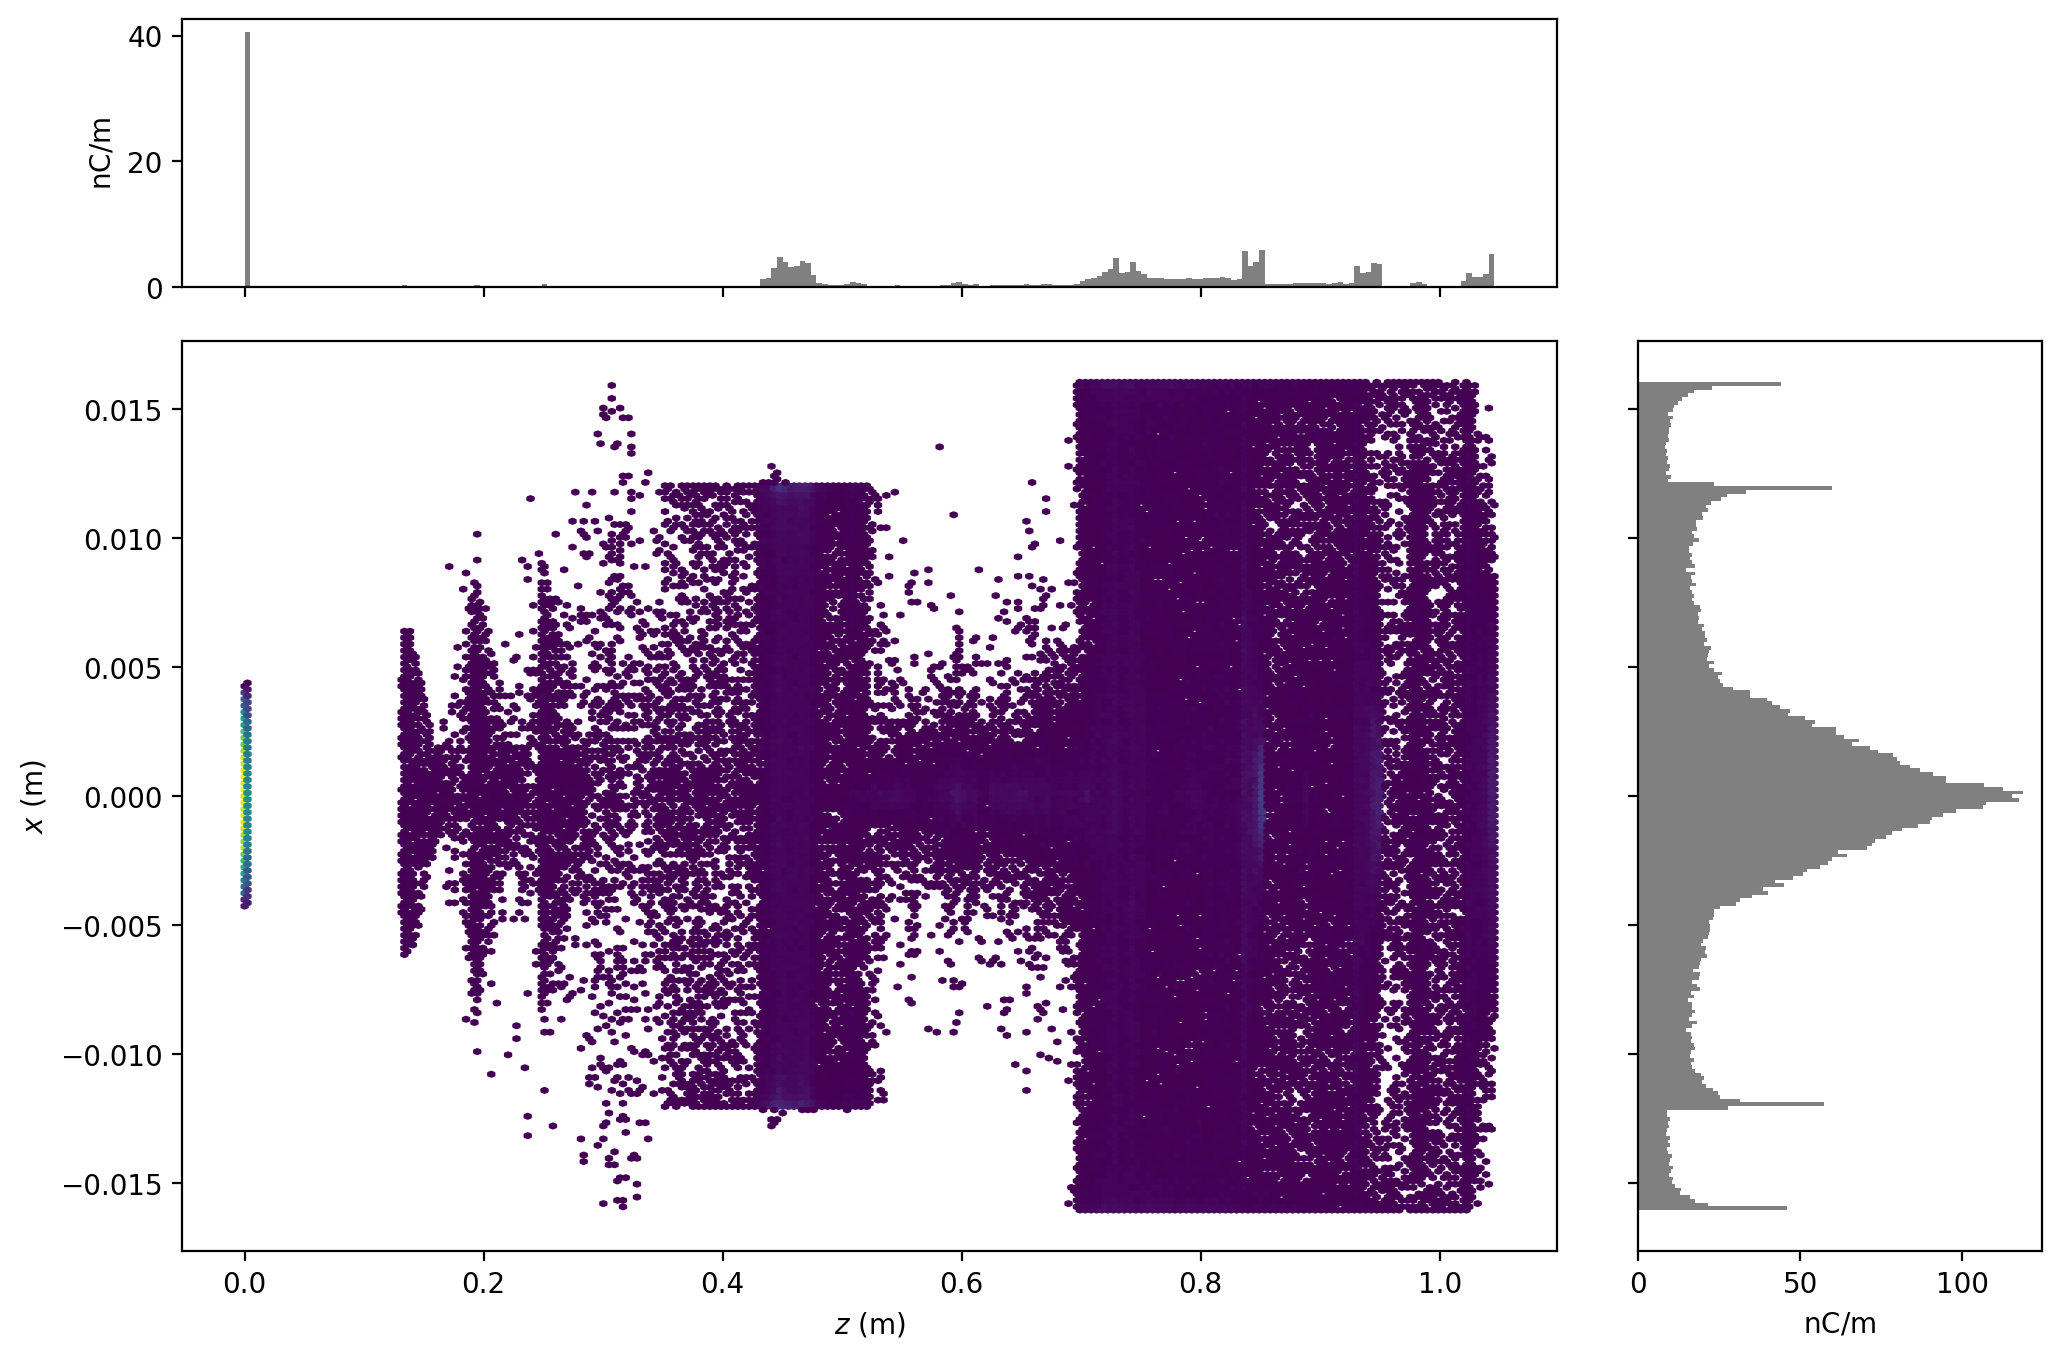

In [22]:
P.plot('z', 'x')

Traces can be made by gathering the coordinate arrays:

[]

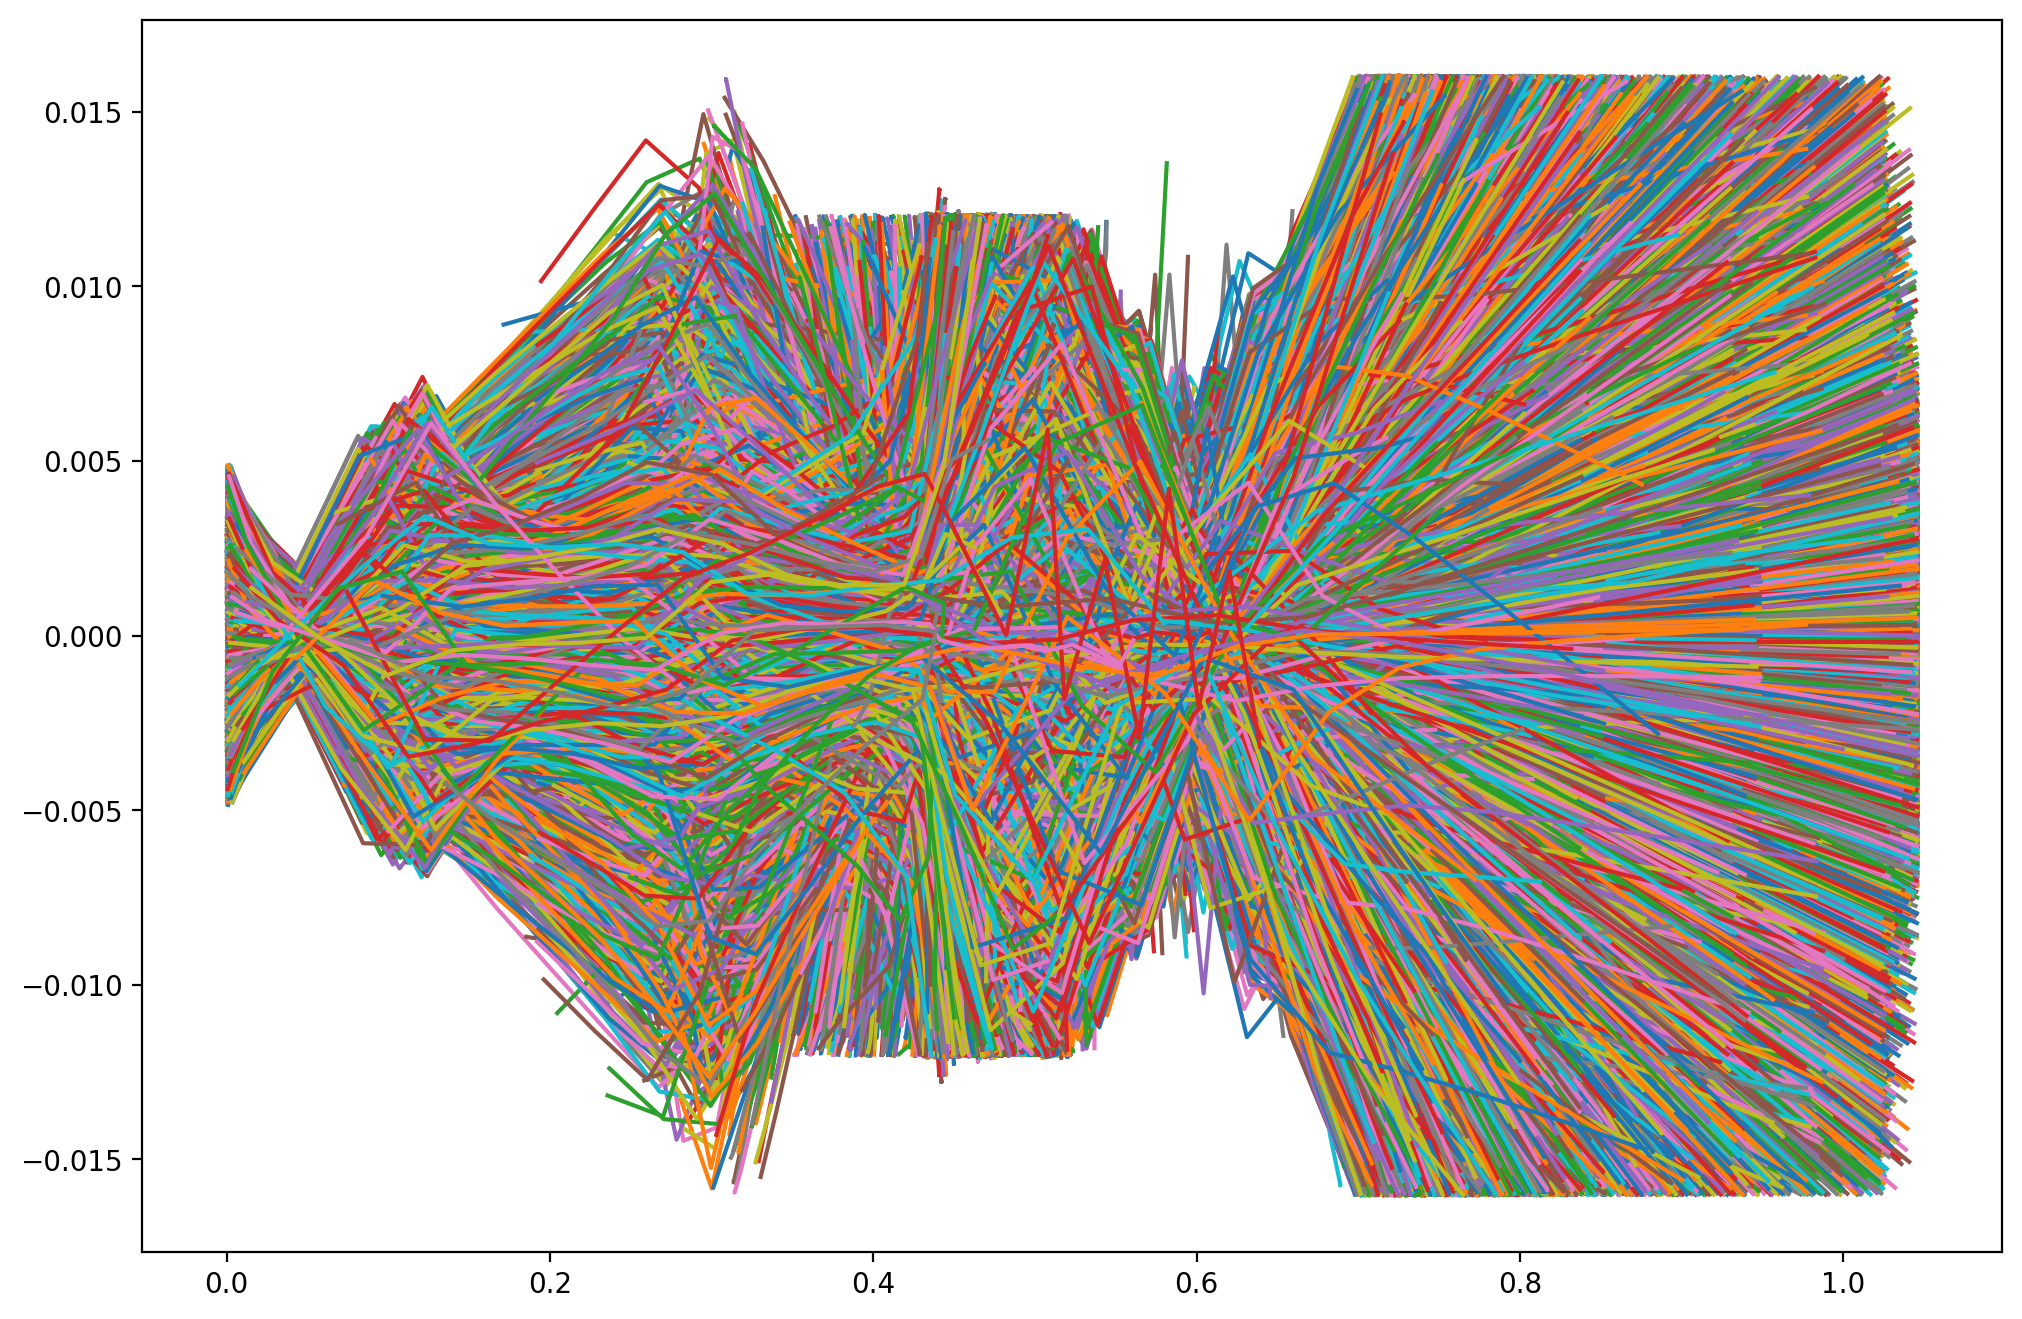

In [23]:
plt.plot(
    [P.z for P in  A.particles],
    [P.x for P in  A.particles]
)
plt.plot()

Change something, run, and plot again:

In [24]:
A.input['solenoid']['maxb(1)'] = 0.04
A.input['charge']['lspch'] =False
A.verbose=False
A.run()

Traces can be made by gathering the coordinate arrays

[]

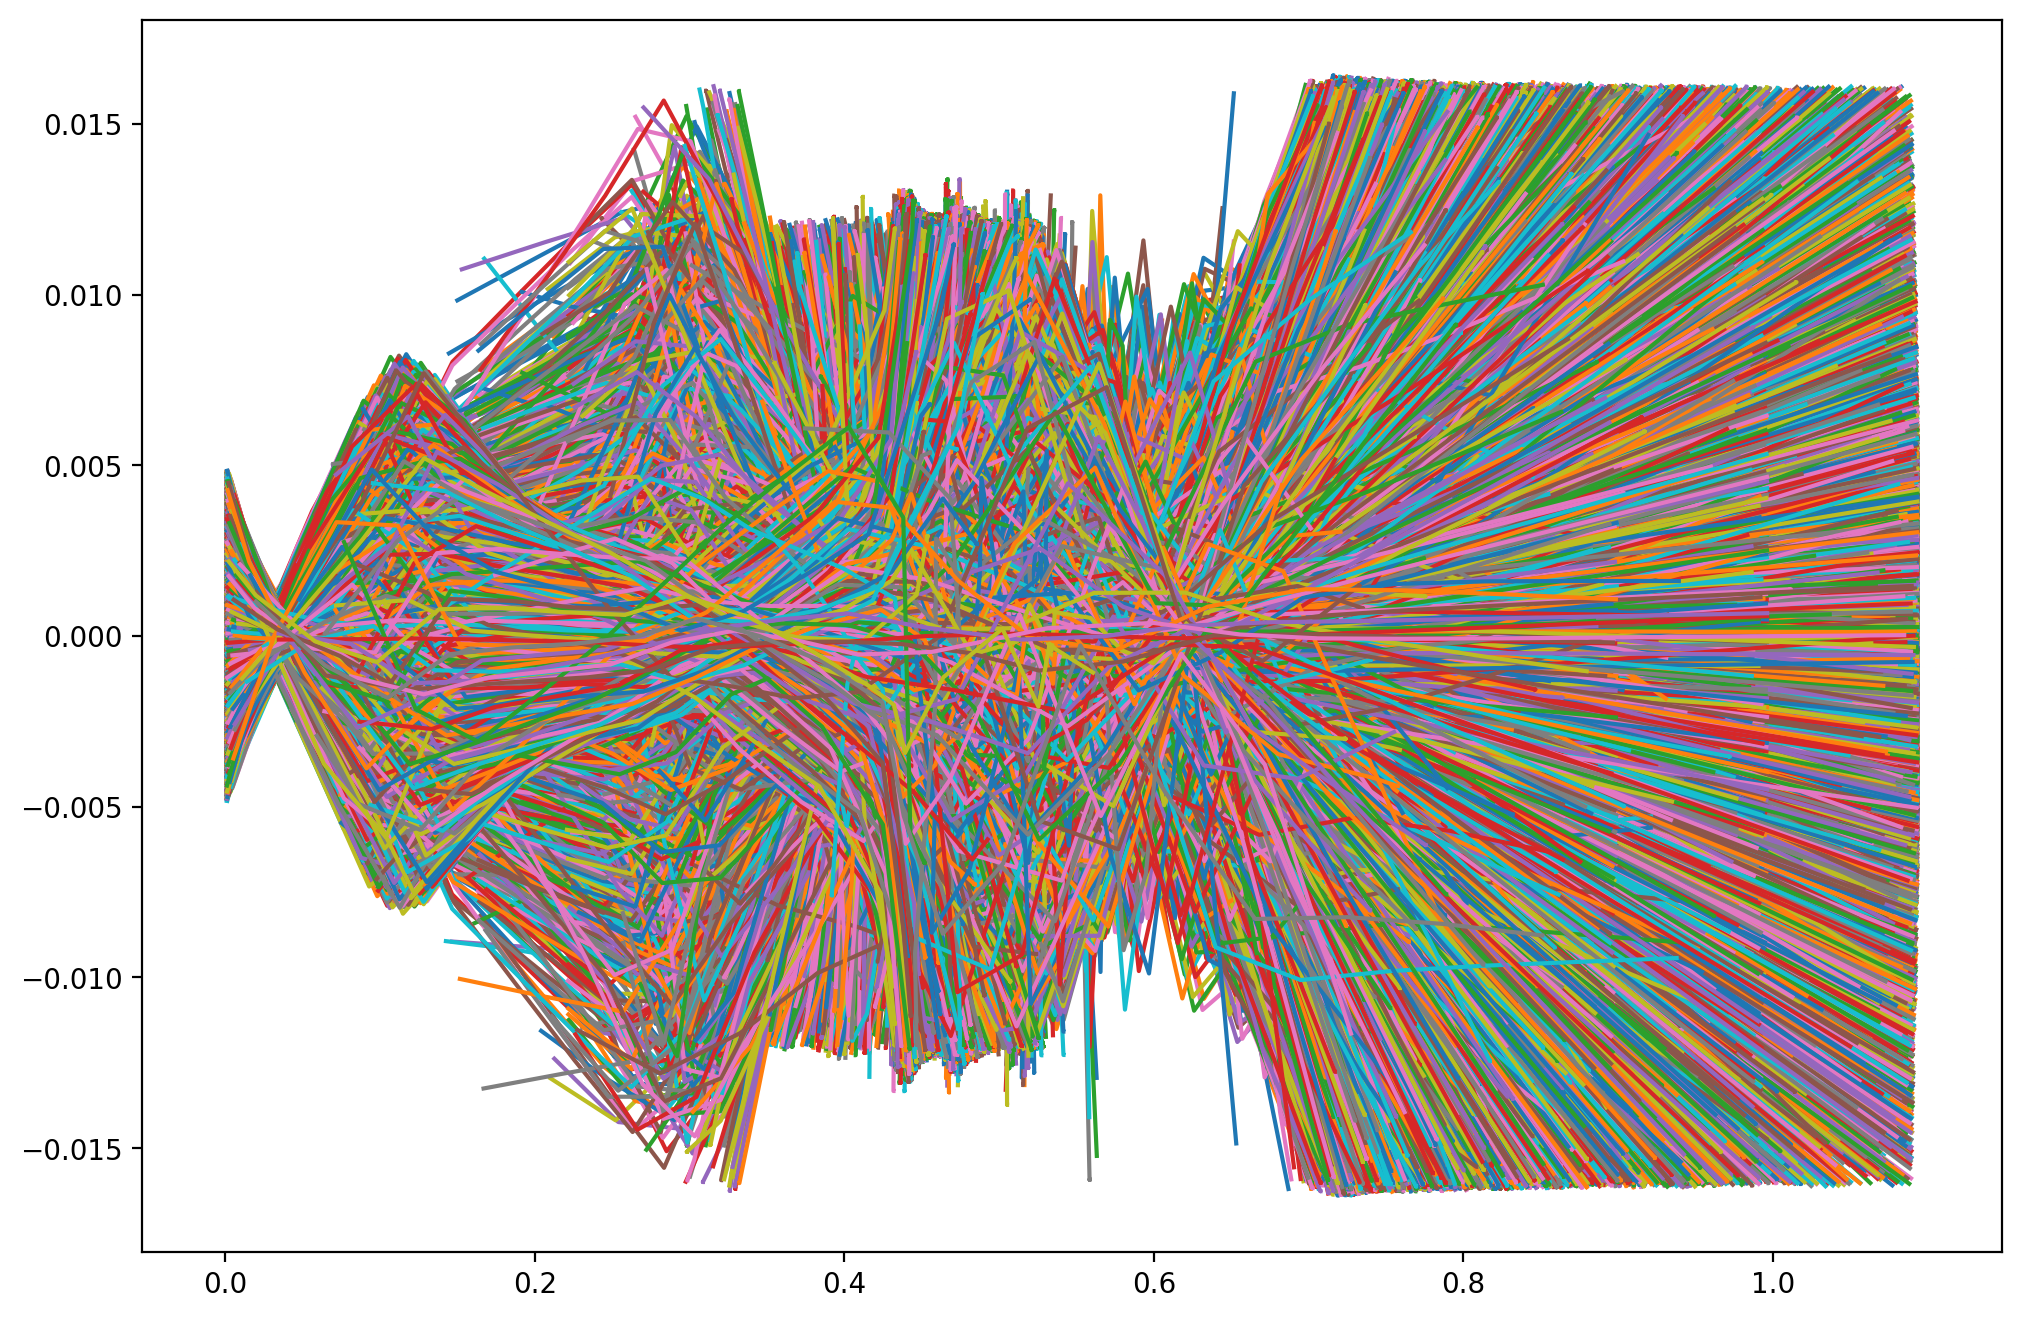

In [25]:

plt.plot(
    [P.z for P in  A.particles],
    [P.x for P in  A.particles]
)
plt.plot()

Similarly a 3D plot is made:

Text(0.5, 0, 'Y (µm)')

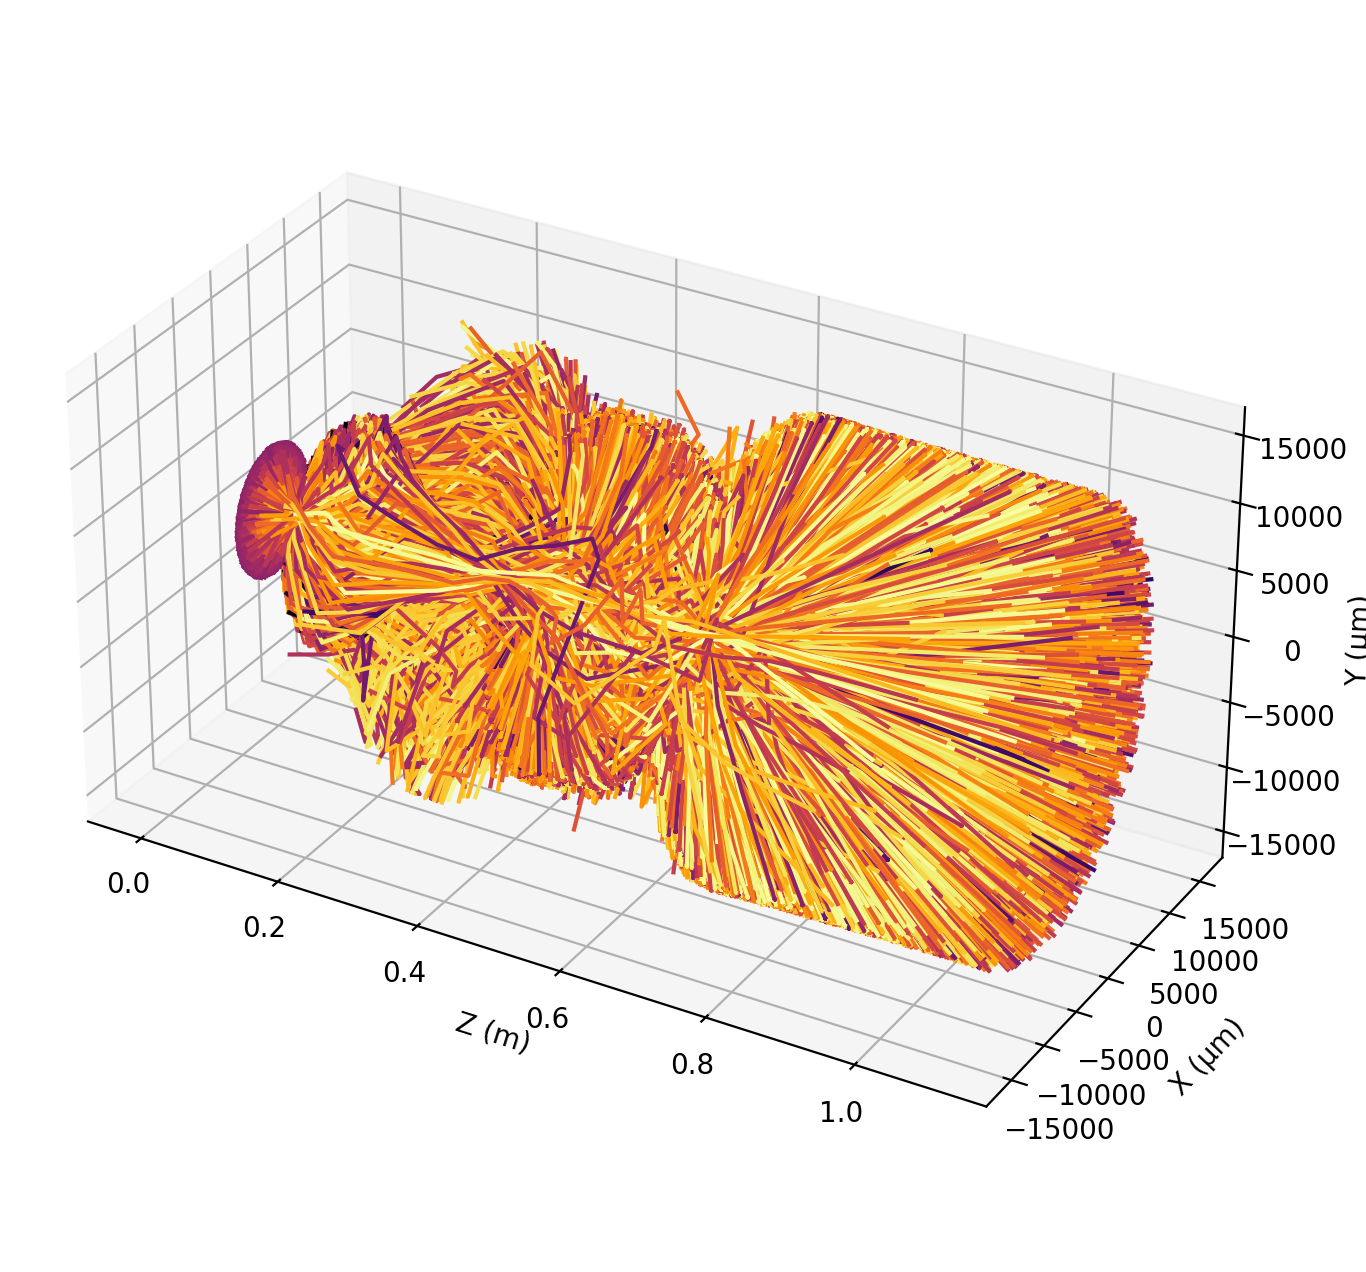

In [26]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = matplotlib.colormaps.get_cmap('inferno')

skip=1
X = np.array([P.x for P in  A.particles]).T[::skip]
Y = np.array([P.y for P in  A.particles]).T[::skip]
Z = np.array([P.z for P in  A.particles]).T[::skip]

scale = np.hypot(X[:, 0], Y[:,0]).max()

# color by  initial radius
for i in range(len(X)):
    color = cmap(1-np.hypot(X[i,0], Y[i,0])/scale)
    ax.plot(X[i]*1e6, Y[i]*1e6, Z[i], zdir='x', color=color)

ax.set_box_aspect((2,1,1))    
    
ax.set_xlabel('Z (m)')
ax.set_ylabel('X (µm)')
ax.set_zlabel('Y (µm)')

# plt.savefig('test.png', dpi=150)

# Stats

Astra computes statistics in several output tables.

Astra's own calculated statistics can be retieved:


In [27]:
len(A.stat('norm_emit_x')), A.stat('norm_emit_x')[-1]

(199, 0.00019176)

Statistics can also be calculated directly from the particles:

In [28]:
A.particle_stat('norm_emit_x')

array([3.75419090e-05, 5.19670385e-05, 5.42316576e-05, 4.86609379e-05,
       1.70817722e-05, 1.19177931e-05, 1.19745560e-05, 1.24675827e-05,
       1.42540390e-05, 4.98021156e-05, 1.46168879e-04, 2.32806868e-04,
       2.49798412e-04, 2.85558990e-04, 2.94383963e-04, 2.86373927e-04,
       2.59476344e-04, 2.32041174e-04, 2.03230531e-04, 1.94372258e-04])

 Compare these:

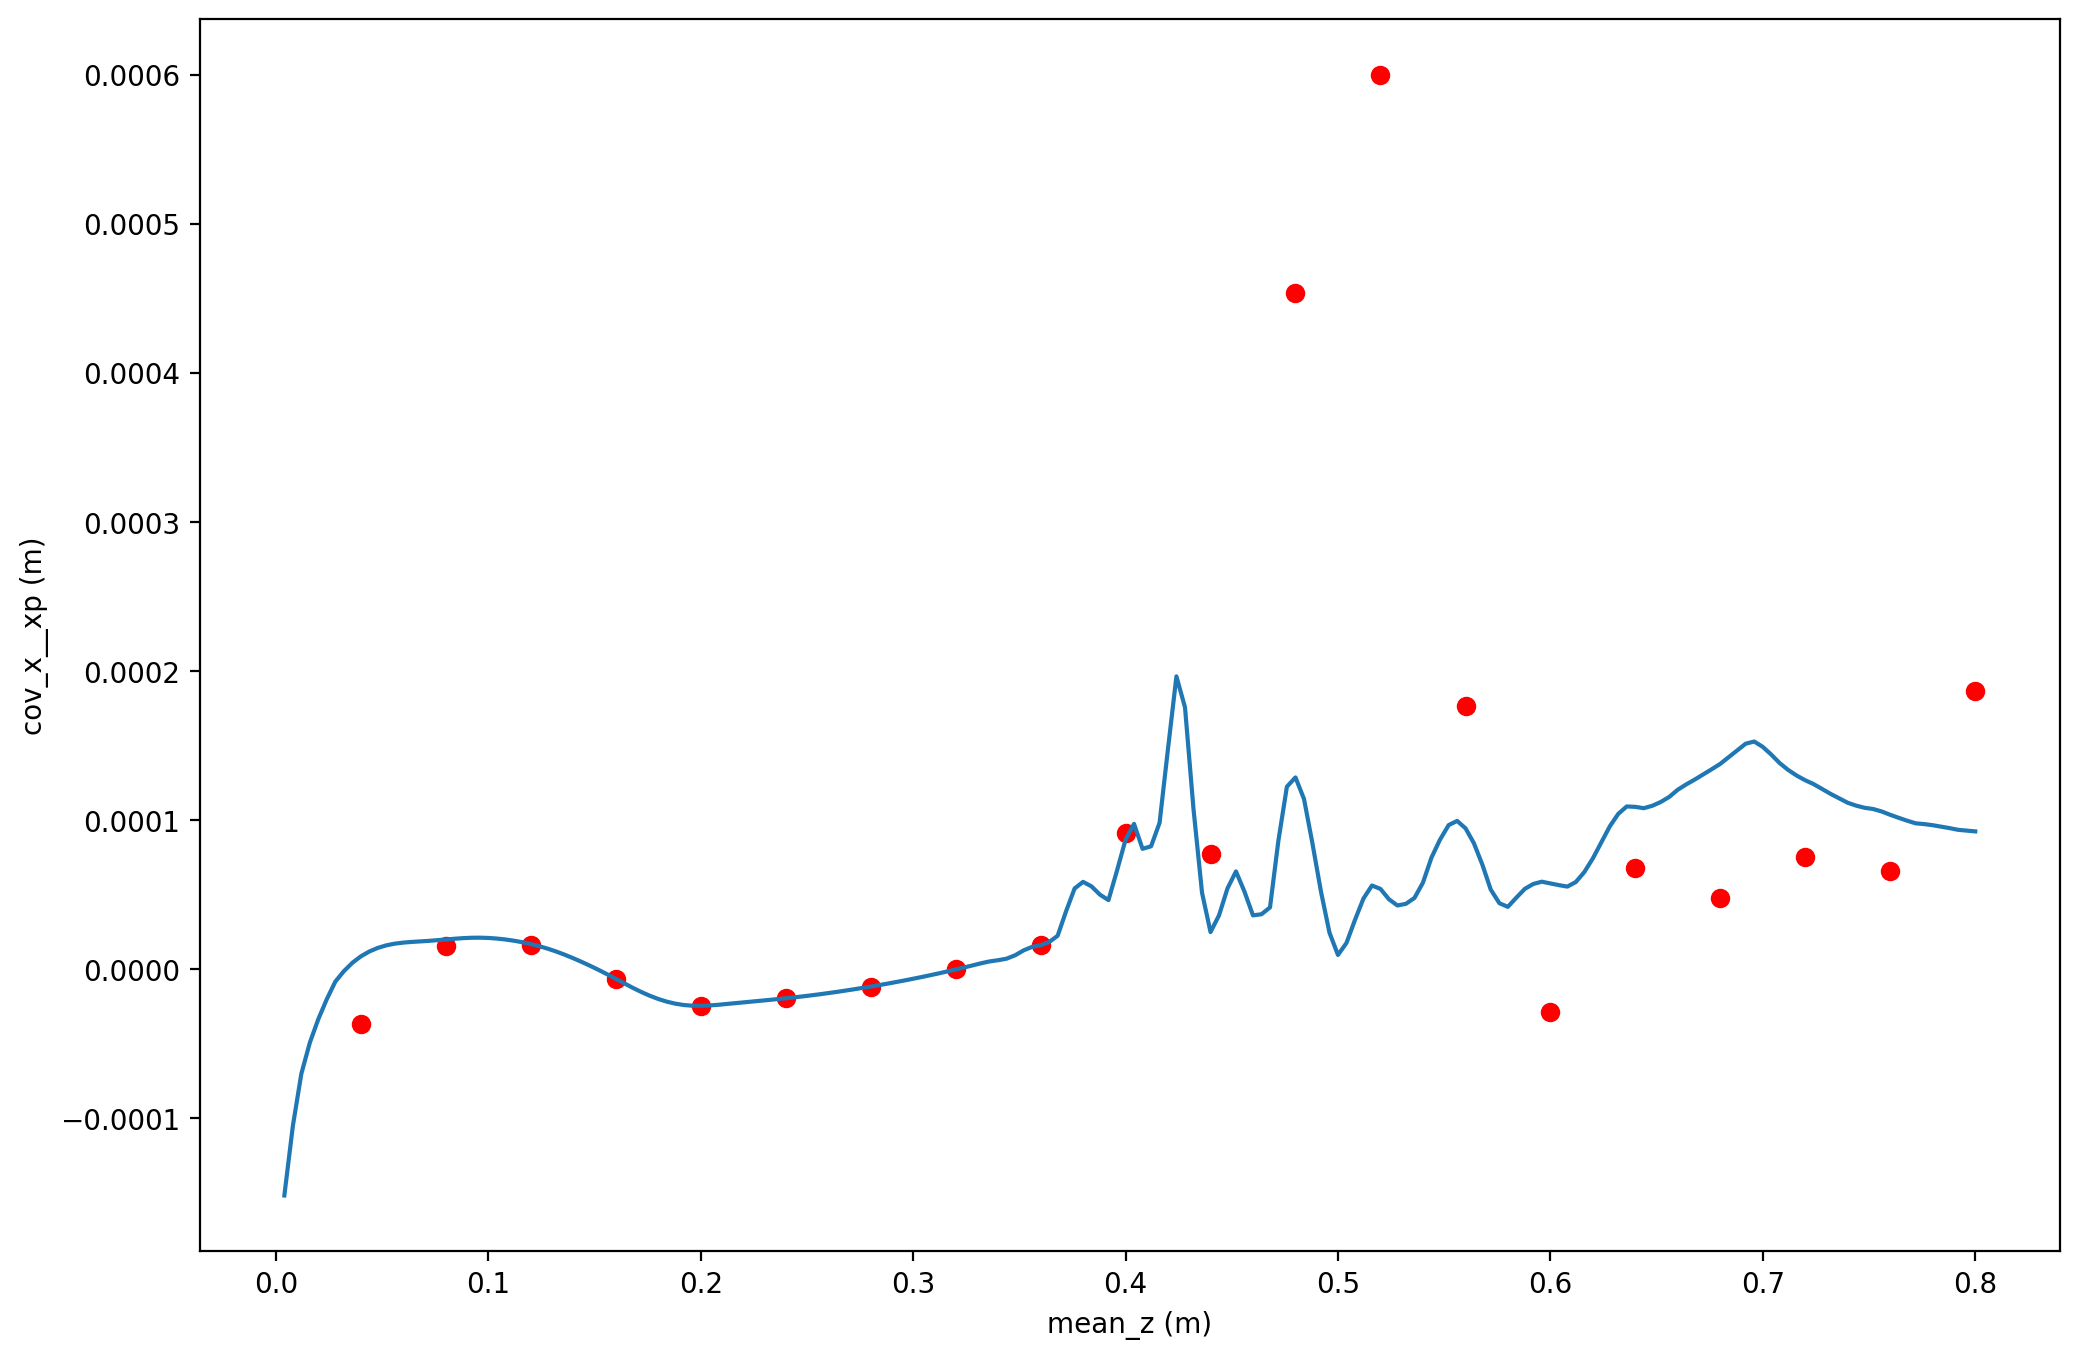

In [29]:
key1 = 'mean_z'
key2 = 'cov_x__xp'
units1 = str(A.units(key1))
units2 = str(A.units(key2))
plt.xlabel(key1+f' ({units1})')
plt.ylabel(key2+f' ({units2})')
plt.plot(A.stat(key1), A.stat(key2))
plt.scatter(A.particle_stat(key1), A.particle_stat(key2), color='red')
#plt.scatter(A.particle_stat(key1, alive_only=False), A.particle_stat(key2, alive_only=False), color='green')

# Fieldmaps

Normally fieldmaps are not loaded into the Astra object. However, for analysis and archiving they can be loaded.

Initially this is empty:

In [30]:
A.fieldmap 

{}

In [31]:
A.verbose=True
A.load_fieldmaps()

Loading fieldmap file /home/jovyan/work/buncher_1.dat
Loading fieldmap file /home/jovyan/work/sol_50_mm.dat
Loading fieldmap file /home/jovyan/work/10A_length_150mm.dat


KeyError: '3d_gun'

A second load just referes to the internal dict.

In [32]:
A.load_fieldmaps()

Loading fieldmap file /home/jovyan/work/buncher_1.dat
Loading fieldmap file /home/jovyan/work/sol_50_mm.dat
Loading fieldmap file /home/jovyan/work/10A_length_150mm.dat


KeyError: '3d_gun'

This will write them to `A.path`:

In [33]:
A.write_fieldmaps()

# Load previously computed run

If Astra was executed manually, and the output files exist along side the input, the Astra object can load them

In [34]:
A2 = Astra(input_file=A.input_file, use_temp_dir = False )
A2.load_output()
A2.output.keys()

dict_keys(['stats', 'particles', 'run_info'])

# Archive all output

All of .input and .output can be archived and loaded from standard h5 files.

Particles are stored in the openPMD-beamphysics format.

In [35]:
H5FILE='astra.h5'

In [36]:
A.archive(H5FILE)

Archiving to file astra.h5


'astra.h5'

If no file is given, a filename will be invented based on the fingerprint:

In [37]:
H5FILE2 = A.archive()
H5FILE2

Archiving to file astra_fabdea39cf39e527150bf418338c9a8f.h5


'astra_fabdea39cf39e527150bf418338c9a8f.h5'

These can be loaded into completely empty objects:

In [38]:
A3 = Astra.from_archive(H5FILE2)

Check that the fingerprints are the same


In [39]:
A3.fingerprint() == A.fingerprint()

True

Spot check that the loaded data is the same as the original:

In [40]:
A3.stat('sigma_z')[-1] == A.stat('sigma_z')[-1]

True

Re-configure to set up working dir and run again:

In [41]:
A3.configure()
A3.run()



Check stats again:


In [42]:
A3.stat('sigma_z')[-1] == A.stat('sigma_z')[-1]

True

Fieldmaps are in here, because they were loaded

In [43]:
A3.fieldmap.keys()

dict_keys([])

# Reading archived files manually

Let's open one of these files manually using `h5py`:

In [ ]:
from h5py import File

In [ ]:
h5 = File(H5FILE, 'r')

Basic input and output groups are at the top level

In [ ]:
list(h5)

Input corresponds to the Asta namelist inputs

In [ ]:
list(h5['input'])

The actual values are in attrs. Retrieve them by casting to a dict:

In [ ]:
dict(h5['input']['newrun'].attrs)

Output contains these datasets:

In [ ]:
list(h5['output'])

Example dataset:

In [ ]:
h5['output']['stats']['norm_emit_x'][-1]

Unit information is stored in the attributes:

In [ ]:
dict(h5['output']['stats']['norm_emit_x'].attrs)

These can be read in with the units using a helper function:

In [ ]:
from pmd_beamphysics.units import read_dataset_and_unit_h5

dat, unit = read_dataset_and_unit_h5(h5['output']['stats']['norm_emit_x'])
unit

Particles are stored in the openPMD-beamphysics standard:

In [ ]:
list(h5['output']['particles']['0'])

These can be read in as a ParticleGroup object. This is the same type of object that A.particles is kept as.

In [ ]:
from pmd_beamphysics import ParticleGroup
P = ParticleGroup(h5['output']['particles']['0'])
P['norm_emit_x']

Cleanup

In [ ]:

import os

os.remove(H5FILE)
os.remove(H5FILE2)

# ControlGroup objects

Some elements need to be changed together, either relatively or absolutely.

Note: this was borroed from lume-impact almost verbatim. Some of the terminology should be reworked.

In [ ]:
A.input['solenoid']

In [ ]:
A9 = A.copy()
A9.add_group('CAV1', ele_names=['cavity'], attributes=['maxe(1)'], var_name='voltage', factors=[1e-6], absolute=True)

In [ ]:
A9.add_group('SOL1', ele_names=['solenoid'], attributes=['s_pos(1)'], var_name='offset', absolute=False)

In [ ]:
A9.group['SOL1']['offset'] =0.5
A9.plot()

# Attribute [] syntax

Values of the input namelists, as well as group attributes, can be set with the bracket syntax.

Get an entire namelist:


In [ ]:
A['solenoid']

Get an attribute:

In [ ]:
A['solenoid:maxb(1)']

Set an attribute, and read it back:

In [ ]:
A['solenoid:maxb(1)'] = 1.2345
A['solenoid:maxb(1)']

Return the last item in the particles list:

In [ ]:
A['particles:-1']

Calculate a statistic:

In [ ]:
A['particles:-1']['sigma_x']

This does the same:

In [ ]:
A['particles:-1:sigma_x']

# Instantiate from YAML

All of the Astra object init arguments can be passed in a YAML file. Any of:

In [ ]:
?Astra

In [ ]:
YAML="""

# Any argument above. One exception is initial_particles: this should be a filename that is parsed into a ParticleGroup

input_file: templates/dcgun/astra.in

verbose: False

group:
  CAV1:
    ele_names: cavity
    var_name: voltage
    attributes: maxe(1)
    factors: [ 1.0e-6 ]  # V -> MV for Astra
    value: 1.234e+6
    absolute: T

  SOL1:
    ele_names: solenoid
    var_name: offset
    attributes: s_pos(1)
    value: 0.54321
    absolute: F


"""

A8 = Astra.from_yaml(YAML)
#A8.verbose

Check that this still works:

In [ ]:
A8['CAV1']['voltage'] = 20e6
A8['cavity']['maxe(1)']

Move the solenoid around:

In [ ]:
A8['SOL1:offset'] = 1
A8.plot_fieldmaps()

# Single particle tracking

`.track1` is a convenience to track a sincle particle through the system.

In [ ]:
A = Astra()
A.track1(x0=1e-3, px0=-1e3, pz0=1e6)

In [ ]:
A.plot('mean_x')